In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate alphas (use magnitudes from [4.5]-[8])

def alpha(f1,f2):
    y = 1.64*(f1-f2)-2.82
    return y

# # Convert magnitudes to flux
# def flux(m,F0):
#     F = F0*10**(m/-2.5)
#     return F
    




In [3]:
# # Load in magnitude data
# f = np.load("../Data_and_Results/Inputs_YSO_Train.npy")
# F = f.transpose() # Access data by band instead of object
# F = F[slice(0,7,2)] # Only look at bands, not errors

# # Convert magnitudes to flux
# for i, F_0 in enumerate([2.343e-10,1.212e-10,6.099e-11,2.403e-11]):
#     F[i] = flux(F[i],F_0)

# F.shape

[0.791 1.323 1.621 ... 1.27  1.617 1.59 ]


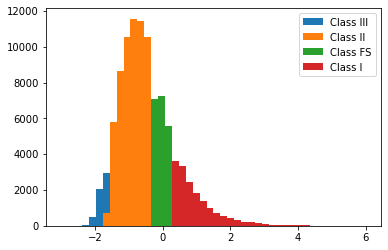

In [4]:
f2 = np.load("../Data_and_Results/Inputs_YSO_Train.npy")
f2 = f2.transpose()
f2 = f2[slice(0,7,2)]

bins = np.linspace(-3, 6, 45)

alph2 = alpha(f2[1],f2[3])
print(f2[1]-f2[3])
# Apply cuts for different YSO classes
aIII = np.where(alph2<-1.6)
plt.hist(alph2[aIII],bins,label='Class III')
aII = np.where((alph2<-0.3) & (alph2>-1.6))
plt.hist(alph2[aII],bins,label='Class II')
aFS = np.where((alph2>-0.3) & (alph2<0.3))
plt.hist(alph2[aFS],bins,label='Class FS')
aI = np.where(alph2>0.3)
plt.hist(alph2[aI],bins,label='Class I')
# plt.hist(alph2)
plt.legend()

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 4.1000e+01, 4.7100e+02,
        2.0390e+03, 3.7130e+03, 5.8250e+03, 8.6700e+03, 1.0525e+04,
        1.1571e+04, 1.1467e+04, 1.0574e+04, 9.0360e+03, 7.2380e+03,
        5.5960e+03, 4.2790e+03, 3.3200e+03, 2.4640e+03, 1.8590e+03,
        1.4040e+03, 1.0210e+03, 6.9500e+02, 5.2900e+02, 4.2700e+02,
        3.4200e+02, 2.2200e+02, 1.9100e+02, 1.4800e+02, 9.4000e+01,
        6.2000e+01, 5.8000e+01, 3.2000e+01, 2.9000e+01, 2.4000e+01,
        4.3000e+01, 1.6000e+01, 1.2000e+01, 1.2000e+01, 0.0000e+00,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([-3.        , -2.79545455, -2.59090909, -2.38636364, -2.18181818,
        -1.97727273, -1.77272727, -1.56818182, -1.36363636, -1.15909091,
        -0.95454545, -0.75      , -0.54545455, -0.34090909, -0.13636364,
         0.06818182,  0.27272727,  0.47727273,  0.68181818,  0.88636364,
         1.09090909,  1.29545455,  1.5       ,  1.70454545,  1.90909091,
         2.11363636,  2.31818182,

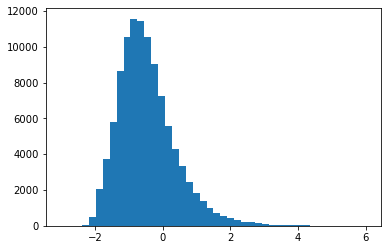

In [5]:
# Checking to see where the last bin ends so I can use this as a cut to separate stars from CIII objects in Megeath
plt.hist(alph2,bins)

In [6]:
# Load in magnitude data
f1 = np.load("../Data_and_Results/Inputs_YSO_Test.npy")
F1 = f1.transpose() # Access data by band instead of object
F1 = F1[slice(0,7,2)] # Only look at bands, not errors

F1.shape

(4, 9971)

(array([2.000e+00, 8.000e+00, 3.100e+01, 1.560e+02, 4.560e+02, 1.546e+03,
        2.353e+03, 1.484e+03, 5.210e+02, 2.250e+02, 1.560e+02, 1.710e+02,
        2.380e+02, 3.010e+02, 3.910e+02, 3.890e+02, 3.710e+02, 2.870e+02,
        2.150e+02, 1.660e+02, 1.060e+02, 9.800e+01, 8.800e+01, 5.400e+01,
        3.600e+01, 2.400e+01, 1.800e+01, 1.400e+01, 1.000e+01, 1.200e+01,
        7.000e+00, 9.000e+00, 8.000e+00, 5.000e+00, 3.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-3.9220800e+00, -3.7354808e+00, -3.5488816e+00, -3.3622824e+00,
        -3.1756832e+00, -2.9890840e+00, -2.8024848e+00, -2.6158856e+00,
        -2.4292864e+00, -2.2426872e+00, -2.0560880e+00, -1.8694888e+00,
        -1.6828896e+00, -1.4962904e+00, -1.3096912e+00, -1.1230920e+00,
        -9.3649280e-01, -7.4989360e-01, -5.6329440e-01, -3.7669520e-01,
        -1.90096

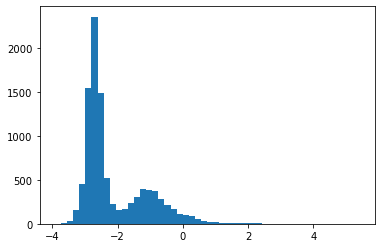

In [7]:
# Calculate alphas and plot as histogram 
alphas = alpha(F1[1],F1[3])

plt.hist(alphas, bins =50)


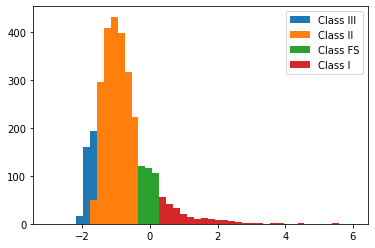

In [8]:
# Clearly many stars mixed in sample; apply cuts for different YSO classes

bins = np.linspace(-3, 6, 45)
aIII = np.where((alphas<-1.6) & (alphas>-2.))
plt.hist(alphas[aIII],bins,label='Class III')
aII = np.where((alphas<-0.3) & (alphas>-1.6))
plt.hist(alphas[aII],bins,label='Class II')
aFS = np.where((alphas>-0.3) & (alphas<0.3))
plt.hist(alphas[aFS],bins,label='Class FS')
aI = np.where(alphas>0.3)
plt.hist(alphas[aI],bins,label='Class I')

plt.legend()

In [9]:
Y = np.load("../Data_and_Results/Targets_YSO_Test.npy")

np.unique(Y)

array([0., 1., 3.])

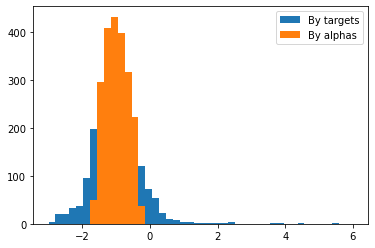

In [10]:
# Compare the cut groups vs the identified groups in Megeath/Rapson for CII

f1 = np.load("../Data_and_Results/Inputs_YSO_Test.npy")
FII = f1[np.where(Y==1.)[0]]
F2 = FII.transpose() # Access data by band instead of object
F2 = F2[slice(0,7,2)] # Only look at bands, not errors

alphasII = alpha(F2[1],F2[3])

plt.hist(alphasII,bins,label='By targets')
plt.hist(alphas[aII],bins,label='By alphas')
plt.legend()

In [11]:
# Look at all groups
bins = np.linspace(-5, 5, 50)
inp_CM = np.load("../Data_and_Results/Inputs_YSO_EG_Stars_alpha.npy")
tar_CM = np.load("../Data_and_Results/Targets_YSO_EG_Stars_alpha.npy")
EG = np.where(tar_CM==1)[0]
alphasEG = inp_CM[EG].transpose()[8]

YSO = np.where(tar_CM==0)[0]
alphasYS = inp_CM[YSO].transpose()[8]

ST = np.where(tar_CM==2)[0]
alphasST = inp_CM[ST].transpose()[8]


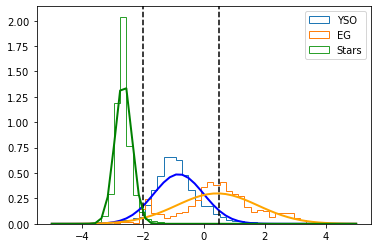

In [29]:
muYS = np.mean(alphasYS)
sigYS = np.std(alphasYS)

muST = np.mean(alphasST)
sigST = np.std(alphasST)

muEG = np.mean(alphasEG)
sigEG = np.std(alphasEG)




plt.hist(alphasYS,bins,histtype='step',label='YSO',density=True)
plt.hist(alphasEG,bins,histtype='step',label='EG',density=True)
plt.hist(alphasST,bins,histtype='step',label='Stars',density=True)
plt.plot(bins, 1/(sigYS * np.sqrt(2 * np.pi)) * np.exp( - (bins - muYS)**2 / (2 * sigYS**2) ),linewidth=2, color='b')
plt.axvline(x=-2.,color='k', linestyle='--')
plt.plot(bins, 1/(sigEG * np.sqrt(2 * np.pi)) * np.exp( - (bins - muEG)**2 / (2 * sigEG**2) ),linewidth=2, color='orange')
plt.plot(bins, 1/(sigST * np.sqrt(2 * np.pi)) * np.exp( - (bins - muST)**2 / (2 * sigST**2) ),linewidth=2, color='g')
plt.axvline(x=0.5,color='k', linestyle='--')
# plt.plot(np.linspace(-5,5,1000),np.random.normal(muYS,sigYS,1000))
plt.legend()

In [27]:
import scipy.stats
from scipy.integrate import quad
def normal_distribution_function(x):
    value = scipy.stats.norm.pdf(x,muYS,sigYS)
    return value

x1 = muYS + 5*sigYS
x2 = 0.5

res, err = quad(normal_distribution_function, x1, x2)

print('Normal Distribution (mean,std):',muYS,sigYS)
print('Integration bewteen {} and {} --> '.format(x1,x2),res)

Normal Distribution (mean,std): -0.8315394282001299 0.8170125219995262
Integration bewteen 3.253523181797501 and 0.5 -->  -0.05157516881042458


In [14]:

def normal_distribution_function(x):
    value = scipy.stats.norm.pdf(x,muST,sigST)
    return value

x2 = muST + 5*sigST
x1 = -2.1

res, err = quad(normal_distribution_function, x1, x2)

print('Normal Distribution (mean,std):',muST,sigST)
print('Integration bewteen {} and {} --> '.format(x1,x2),res)

Normal Distribution (mean,std): -2.6465825337372624 0.2823913209529823
Integration bewteen -2.1 and -1.234625928972351 -->  0.02646113025592815


In [30]:

def normal_distribution_function(x):
    value = scipy.stats.norm.pdf(x,muEG,sigEG)
    return value

x2 = muEG + 5*sigEG
x1 = 0.5

res, err = quad(normal_distribution_function, x1, x2)

print('Normal Distribution (mean,std):',muEG,sigEG)
print('Integration bewteen {} and {} --> '.format(x1,x2),res)

Normal Distribution (mean,std): 0.4336783786557208 1.3323874869505836
Integration bewteen 0.5 and 7.095615813408639 -->  0.4801499495755474
